In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 


df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-03/data.csv')


# Cleaning the data

In [38]:
df.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2/3/16,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,8/18/15,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [318]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


Data was taken from  [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) 


DATA DESCRIPTION: 1). Date - date of order  2). Store Number - unique number assigned to the store who ordered the liquor 3). City - city where the store who ordered the liquor is located 4). Zip code - zip code where the store who ordered the liquor is located 5). County number - Iowa county number for the county where store who ordered the liquor is located 6). Category - category code associated with the liquor ordered 7). Categoty Name - category of the liquor ordered. 8). Vendor Number - the vendor number of the company for the brand of liquor ordered 9). Item Number - item number for the individual liquor product ordered. 10). Item Description - description of the individual liquor product ordered 11). Bottle Volume - volume of each liquor bottle ordered in milliliters 12).State Bottle Cost - the amount that Alcoholic Beverages Division paid for each bottle of liquor ordered 13). State Bottle Retail - the amount the store paid for each bottle of liquor ordered 14). Bottles Sold - the number of bottles of liquor ordered by the store 15). Sale (Dollars) - total cost of liquor order (number of bottles multiplied by the state bottle retail) 16). Volume Sold (Liters) - total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000) 17). Volume Sold (Gallons)- total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)



In [319]:
#checking info about data and variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [320]:
#Identifying column with missing values
# Becasue some counties are missing, I will be working with zip codes

df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [321]:
# Checking whether zip codes are ok
df['Zip Code'].value_counts().sort_index()

50002      43
50003     318
50006     122
50009    2113
50010    7091
50014     457
50020     149
50021    2527
50022    1045
50023    2309
50025     209
50028      58
50033      74
50035     363
50036    1443
50044      16
50046      51
50047     182
50048      37
50049     478
50054     192
50056      27
50058     118
50060     130
50061       6
50069     132
50071      13
50072      37
50075      92
50076      22
         ... 
52641    1105
52653     194
52655     750
52656     175
52722    3709
52726     425
52728      36
52730     139
52732    2853
52733     258
52738     290
52742     201
52747     247
52748     693
52751      64
52753     594
52761    3397
52768      39
52772     505
52776     272
52777      26
52778     314
52801       2
52802    1476
52803     880
52804    3048
52806    2261
52807    3542
56201      23
712-2     217
Name: Zip Code, dtype: int64

In [322]:
# Checking what city has incorrect zip code

a=pd.pivot_table(df[df['Zip Code']=='712-2'], index=['City']);
a

,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Store Number,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters)
City,,,,,,,,,
DUNLAP,970.16129,5.437788,1.051434e+06,43.0,52156.437788,4307.0,252.354839,1.461705,5.533502


In [323]:
# Correcting the wrong zip code

def replace_zip(value):
    if value == '712-2':
        return '51529'
    else:
        return value
    
df['Zip Code']=df['Zip Code'].map(replace_zip);
df['Zip Code'].value_counts().sort_index()

50002      43
50003     318
50006     122
50009    2113
50010    7091
50014     457
50020     149
50021    2527
50022    1045
50023    2309
50025     209
50028      58
50033      74
50035     363
50036    1443
50044      16
50046      51
50047     182
50048      37
50049     478
50054     192
50056      27
50058     118
50060     130
50061       6
50069     132
50071      13
50072      37
50075      92
50076      22
         ... 
52639      38
52641    1105
52653     194
52655     750
52656     175
52722    3709
52726     425
52728      36
52730     139
52732    2853
52733     258
52738     290
52742     201
52747     247
52748     693
52751      64
52753     594
52761    3397
52768      39
52772     505
52776     272
52777      26
52778     314
52801       2
52802    1476
52803     880
52804    3048
52806    2261
52807    3542
56201      23
Name: Zip Code, dtype: int64

In [324]:
# Renaming columns:

df.rename(columns={'Date':'date',
                      'Store Number':'store', 
                      'City': 'city',
                      'Zip Code':'zip',
                      'Category Name':'category',
                       'County Number': 'county_number',
                       'County':'county',
                       'Category': 'cat_description',
                      'Vendor Number': 'vendor',
                      'Item Description':'item',
                       'Item Number': 'item_number',
                      'Bottle Volume (ml)':'volume', 
                      'State Bottle Cost':'cost',
                      'State Bottle Retail':'retail',
                      'Bottles Sold':'sold',
                      'Sale (Dollars)':'sale',
                      'Volume Sold (Liters)':'volume_liters'}, inplace=True)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
date                     270955 non-null object
store                    270955 non-null int64
city                     270955 non-null object
zip                      270955 non-null object
county_number            269878 non-null float64
county                   269878 non-null object
cat_description          270887 non-null float64
category                 270323 non-null object
vendor                   270955 non-null int64
item_number              270955 non-null int64
item                     270955 non-null object
volume                   270955 non-null int64
cost                     270955 non-null object
retail                   270955 non-null object
sold                     270955 non-null int64
sale                     270955 non-null object
volume_liters            270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [326]:
#converting variables into floats


df['cost']=df['cost'].replace('[\$,]', '', regex=True).astype(float);
df['retail']=df['retail'].replace('[\$,]', '', regex=True).astype(float);
df['sale']=df['sale'].replace('[\$,]', '', regex=True).astype(float);
df['sold']=df['sold'].apply(lambda x: float(x));
#df['volume']=df['volume'].apply(lambda x: float(x));

#converting dates

df["date"] = pd.to_datetime(df["date"], format="%m/%d/%y");
df['date']=df['date'].apply(lambda x: str(x));
df['year']=df['date'].map(lambda x: x.split('-')[0]);
df['month']=df['date'].map(lambda x: x.split('-')[1]);



In [327]:
# calculating difference between state retail price and state bottle cost

df['margin']=(df['retail']-df['cost']);
df['margin'];

In [328]:
#df.category.fillna(df.item, inplace=True);

df.isnull().sum()

date                        0
store                       0
city                        0
zip                         0
county_number            1077
county                   1077
cat_description            68
category                  632
vendor                      0
item_number                 0
item                        0
volume                      0
cost                        0
retail                      0
sold                        0
sale                        0
volume_liters               0
Volume Sold (Gallons)       0
year                        0
month                       0
margin                      0
dtype: int64

In [329]:
df['category'].value_counts().sort_index()

100 PROOF VODKA                        3304
AMARETTO - IMPORTED                       3
AMERICAN ALCOHOL                        573
AMERICAN AMARETTO                      1346
AMERICAN COCKTAILS                     6929
AMERICAN DRY GINS                      6559
AMERICAN GRAPE BRANDIES                6589
AMERICAN SLOE GINS                      169
ANISETTE                                 35
APPLE SCHNAPPS                          774
APRICOT BRANDIES                       1109
BARBADOS RUM                            393
BLACKBERRY BRANDIES                    1580
BLENDED WHISKIES                      11547
BOTTLED IN BOND BOURBON                 190
BUTTERSCOTCH SCHNAPPS                   897
CANADIAN WHISKIES                     27087
CHERRY BRANDIES                         330
CINNAMON SCHNAPPS                       729
COFFEE LIQUEURS                        1914
CORN WHISKIES                            12
CREAM LIQUEURS                         6284
CREME DE ALMOND                 

In [330]:
## Replacing missing category names
df['category'] = df['category'].fillna(value=df['item']);
df.isnull().sum()

date                        0
store                       0
city                        0
zip                         0
county_number            1077
county                   1077
cat_description            68
category                    0
vendor                      0
item_number                 0
item                        0
volume                      0
cost                        0
retail                      0
sold                        0
sale                        0
volume_liters               0
Volume Sold (Gallons)       0
year                        0
month                       0
margin                      0
dtype: int64

In [331]:
df['category'] = df['category'].apply(lambda x: str(x))

In [332]:

def liq_category(words):
        if 'vodka' in words.lower() or 'goose' in words.lower() or\
        'svedka' in words.lower() or 'absolut' in words.lower():
            return 'VODKA'
        elif'rum' in words.lower() or 'morgan' in words.lower():
            return 'RUM'
        elif 'WHISKEY' in words or 'WHISKIES' in words or 'WHISKY' in words or 'BOURBON' in words:
            return 'WHISKEY'
        elif 'SCHNAPPS' in words:
            return 'SCHNAPPS'
        elif 'COCKTAILS' in words or 'ROCK & RYE' in words:
            return 'COCKTAILS'
        elif 'BRANDIES' in words or 'cognac' in words.lower() or 'hennessy'\
        in words.lower() or 'vsop' in words.lower():
            return 'BRANDY'
        elif 'GINS' in words:
            return 'GIN'
        elif 'SCOTCH' in words:
            return 'SCOTCH'
        elif 'liqueur' in words.lower() or 'CREME' in words or 'amaretto'\
        in words.lower() or 'SEC' in words or 'ANISETTE' in words or 'marnier' in words.lower()\
        or 'egg' in words.lower() or 'domaine' in words.lower():
            return 'LIQUOR'
        elif 'SPIRITS' in words:
            return 'SPIRITS'
        elif 'TEQUILA' in words or 'reposado' in words.lower() or 'silver' in words.lower():
            return 'TEQUILA'
        else:
            return "OTHER"

In [333]:
#df['Category Name'].value_counts().sort_index()

df['category']=df['category'].map(liq_category);


df['category'].value_counts().nunique();

df['category'].value_counts()

WHISKEY      82057
VODKA        70063
RUM          32784
LIQUOR       21607
BRANDY       15273
SCHNAPPS     14564
TEQUILA      12166
GIN           9917
COCKTAILS     7015
SCOTCH        2288
OTHER         1841
SPIRITS       1380
Name: category, dtype: int64

In [334]:
df.isnull().sum()

date                        0
store                       0
city                        0
zip                         0
county_number            1077
county                   1077
cat_description            68
category                    0
vendor                      0
item_number                 0
item                        0
volume                      0
cost                        0
retail                      0
sold                        0
sale                        0
volume_liters               0
Volume Sold (Gallons)       0
year                        0
month                       0
margin                      0
dtype: int64

In [335]:

list_of_cols_i_want = ['store', 'city','zip', 'category', 'vendor','item','volume','cost','retail',\
                       'sold','sale','year', 'month', 'margin'];

df_final=df[list_of_cols_i_want];
df_final.head()

,store,city,zip,category,vendor,item,volume,cost,retail,sold,sale,year,month,margin
0,3717,SUMNER,50674,BRANDY,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12.0,81.00,2015,11,2.25
1,2614,DAVENPORT,52807,WHISKEY,395,Tin Cup,750,13.75,20.63,2.0,41.26,2016,03,6.88
2,2106,CEDAR FALLS,50613,WHISKEY,65,Jim Beam,1000,12.59,18.89,24.0,453.36,2016,02,6.30
3,2501,AMES,50010,COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6.0,85.50,2016,02,4.75
4,3654,BELMOND,50421,VODKA,297,Five O'clock Vodka,1750,7.20,10.80,12.0,129.60,2015,08,3.60


In [336]:
df_final.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-03/clean_data.csv", index=False)

## Exploring data



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-03/clean_data.csv')

In [9]:
df.head()

,store,city,zip,category,vendor,item,volume,cost,retail,sold,sale,year,month,margin
0,3717,SUMNER,50674,BRANDY,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12.0,81.00,2015,11,2.25
1,2614,DAVENPORT,52807,WHISKEY,395,Tin Cup,750,13.75,20.63,2.0,41.26,2016,3,6.88
2,2106,CEDAR FALLS,50613,WHISKEY,65,Jim Beam,1000,12.59,18.89,24.0,453.36,2016,2,6.30
3,2501,AMES,50010,COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6.0,85.50,2016,2,4.75
4,3654,BELMOND,50421,VODKA,297,Five O'clock Vodka,1750,7.20,10.80,12.0,129.60,2015,8,3.60


In [10]:
# calculating sum of sale by zip code

df_sum_sale=pd.pivot_table(df,index=['zip'], values=['sale'], aggfunc=[sum]);
df_sum_sale.reset_index(inplace=True);
df_sum_sale.head()

,zip,sum
,,sale
0,50002,5851.20
1,50003,47716.10
2,50006,12280.24
3,50009,298406.69
4,50010,932695.71


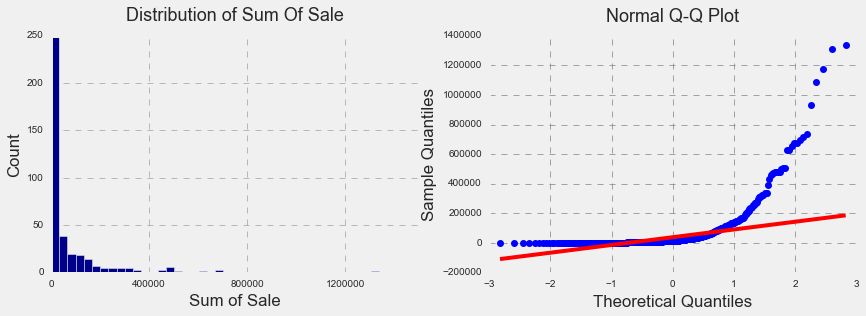

In [11]:


plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1,2, figsize=(12,4))
plt.tight_layout(w_pad=3)



axes[0].hist(df_sum_sale['sum', 'sale'], bins=40, color='darkblue')
axes[0].set_title("Distribution of Sum Of Sale",fontsize=18,y=1.04)
axes[0].grid(color='gray', linestyle='--', alpha=.5)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Sum of Sale')
axes[0].set_ylim([0,250])
axes[0].set_xlim([0,1500000])

axes[0].set_xticks(range(0,1400000, 400000))


#stats.probplot(df_sum_sale['sum', 'sale'], plot=axes[1])

sm.qqplot(df_sum_sale['sum', 'sale'], ax=axes[1], line='q')
# probplot = stats.ProbPlot(df_sum_sale['sum', 'sale'])
# probplot.qqplot()
#stats.graphics.gofplots.qqplot(df_sum_sale['sum', 'sale'], dist="norm", plot=pylab)
sm.ProbPlot(df_sum_sale['sum', 'sale'], scale=6)
# fig = probplot.qqplot(line='45')
axes[1].set_title("Normal Q-Q Plot",fontsize=18,y=1.04)
axes[1].grid(color='gray', linestyle='--', alpha=.7)
#axes[1].legend(handler_map=False)
#axes[1].annotate(horizontalalignment='right', verticalalignment='top')
#axes[1].set_text(verticalalignment='top')

plt.show()

In [7]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [5]:

df0=pd.pivot_table(df,index=['zip'], values=['sale']);
df0.reset_index(inplace=True);
df0.head()

,zip,sale
0,50002,136.074419
1,50003,150.050629
2,50006,100.657705
3,50009,141.224179
4,50010,131.532324


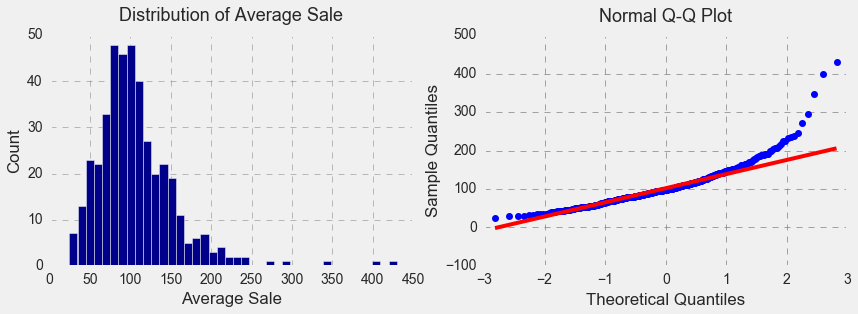

In [123]:
import statsmodels.api as smf
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1,2, figsize=(12,4))
plt.tight_layout(w_pad=2.5)


axes[0].hist(df0['sale'], bins=40, color='darkblue')
axes[0].set_title("Distribution of Average Sale",fontsize=18,y=1.04)
axes[0].grid(color='gray', linestyle='--', alpha=.5)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Average Sale')
# axes[0].set_ylim([0,14000])
# axes[0].set_xlim([0,80000])
# axes[0].set_xticks(range(0,80000, 10000))


sm.qqplot(df0['sale'], ax=axes[1], line='q')
axes[1].set_title("Normal Q-Q Plot",fontsize=18,y=1.04)
axes[1].grid(color='gray', linestyle='--', alpha=.7)
plt.show()

plt.show()

In [75]:
df0_no_outliers=df0[df0['sale']<250];
df0_no_outliers.head()

,zip,sale
0,50002,136.074419
1,50003,150.050629
2,50006,100.657705
3,50009,141.224179
4,50010,131.532324


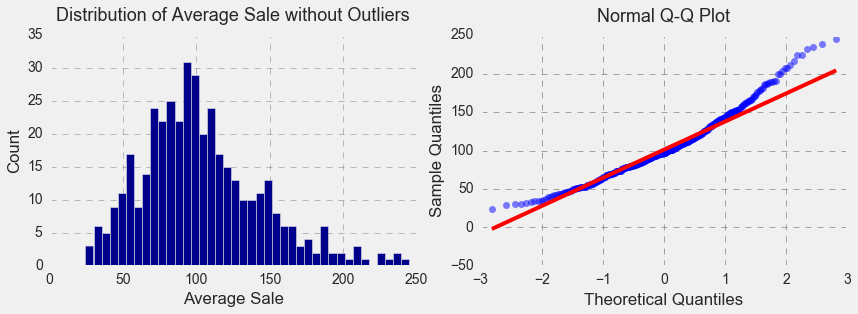

In [120]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1,2, figsize=(12,4))
plt.tight_layout(w_pad=2)


axes[0].hist(df0_no_outliers['sale'], bins=40, color='darkblue')
axes[0].set_title("Distribution of Average Sale without Outliers", fontsize=18,y=1.04)
axes[0].grid(color='gray', linestyle='--', alpha=.5)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Average Sale')
# axes[0].set_ylim([0,14000])
# axes[0].set_xlim([0,80000])
# axes[0].set_xticks(range(0,80000, 10000))


fig=sm.qqplot(df0_no_outliers['sale'], ax=axes[1], line='q')
dots = fig.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')
[d.set_alpha(0.5) for d in dots]
axes[1].set_title("Normal Q-Q Plot",fontsize=18,y=1.04)
axes[1].grid(color='gray', linestyle='--', alpha=.7)
plt.show()

plt.show()

In [77]:
# Creating a data frame and calculating number of vendors and stores for each zip code 

df1=pd.pivot_table(df,index=['zip','month','category','year'], values=['volume', 'retail', 'sold', 'sale']);
df1.reset_index(inplace=True)

In [78]:
df2=df.groupby('zip')['vendor'].nunique().to_frame();
df2.reset_index(inplace=True);
df2.head()

,zip,vendor
0,50002,14
1,50003,25
2,50006,22
3,50009,45
4,50010,78


In [79]:
df3=df2.merge(df1);
df4=df.groupby('zip')['store'].nunique().to_frame()
df4.reset_index(inplace=True);


In [80]:
df5=df4.merge(df3);
df6=df5[df5['sale']<250];
df6.head()

,zip,store,vendor,month,category,year,retail,sale,sold,volume
0,50002,2,14,1,LIQUOR,2015,5.07,60.84,12.0,750.0
1,50002,2,14,1,RUM,2015,7.50,180.00,24.0,375.0
2,50002,2,14,1,RUM,2016,27.00,162.00,6.0,1750.0
3,50002,2,14,1,VODKA,2015,2.70,64.80,24.0,375.0
4,50002,2,14,1,WHISKEY,2015,13.47,161.64,12.0,750.0


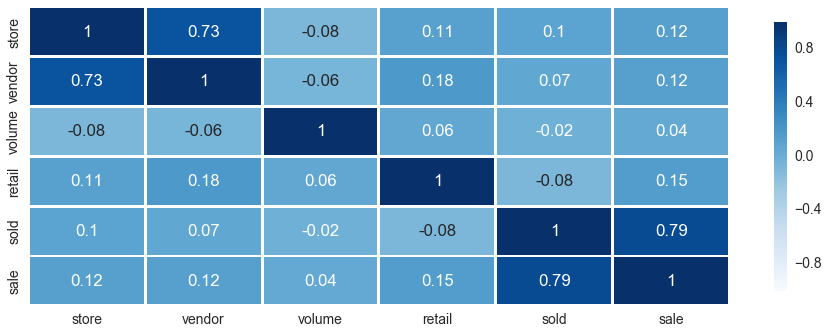

In [105]:
list_of_cols_i_want = ['store', 'vendor','volume','retail','sold','sale'];

df7=df5[list_of_cols_i_want];

df7.corr(method='pearson').round(2)

corr = df7.corr().round(decimals=2)
sns.set(font_scale=1.4)
plt.subplots( figsize=(14, 5))
#cmap = sns.diverging_palette(300, 350, as_cmap=True)
#cmap = sns.diverging_palette(65, 300, as_cmap=True)
#cmap = sns.diverging_palette(300, 260, as_cmap=True)
sns.heatmap (corr, annot=True,cmap='Blues',cbar_kws={"shrink": .9},linewidths=2)
plt.show()

In [82]:
df6.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-03/model_frame.csv", index=False)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab 
import statsmodels.api as sm

df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-03/model_frame.csv')

df.head()

,zip,store,vendor,month,category,year,retail,sale,sold,volume
0,50002,2,14,1,LIQUOR,2015,5.07,60.84,12.0,750.0
1,50002,2,14,1,RUM,2015,7.50,180.00,24.0,375.0
2,50002,2,14,1,RUM,2016,27.00,162.00,6.0,1750.0
3,50002,2,14,1,VODKA,2015,2.70,64.80,24.0,375.0
4,50002,2,14,1,WHISKEY,2015,13.47,161.64,12.0,750.0


## Building the Model

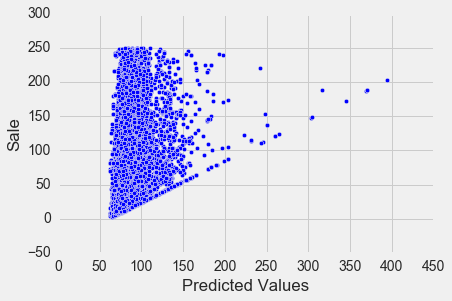

MSE: 2554.88557311
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2295.
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:35   Log-Likelihood:            -1.7475e+05
No. Observations:               32714   AIC:                         3.495e+05
Df Residuals:                   32712   BIC:                         3.495e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.2192      0.573 

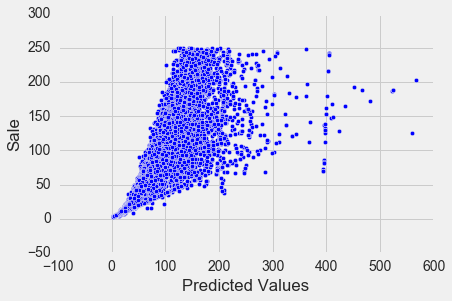

MSE: 1014.10668472
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 2.774e+04
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:36   Log-Likelihood:            -1.5964e+05
No. Observations:               32714   AIC:                         3.193e+05
Df Residuals:                   32711   BIC:                         3.193e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.9933      0.494 

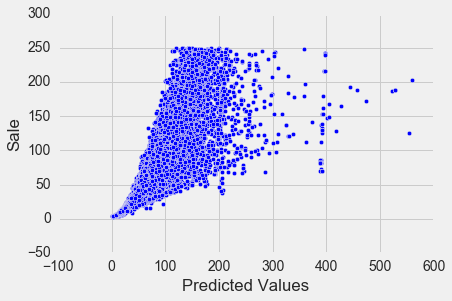

MSE: 1004.67334687
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 1.877e+04
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:36   Log-Likelihood:            -1.5949e+05
No. Observations:               32714   AIC:                         3.190e+05
Df Residuals:                   32710   BIC:                         3.190e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -16.5378      0.500 

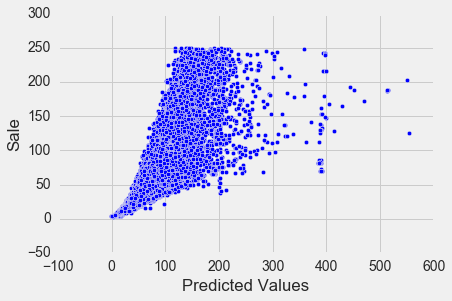

MSE: 998.027286389
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:37   Log-Likelihood:            -1.5938e+05
No. Observations:               32714   AIC:                         3.188e+05
Df Residuals:                   32709   BIC:                         3.188e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -22.7486      0.652 

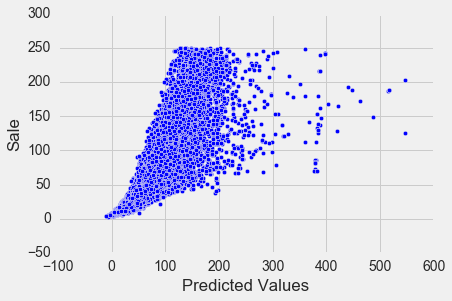

MSE: 967.765516556
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                 1.493e+04
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:37   Log-Likelihood:            -1.5887e+05
No. Observations:               32714   AIC:                         3.178e+05
Df Residuals:                   32709   BIC:                         3.178e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -33.4191      0.685 

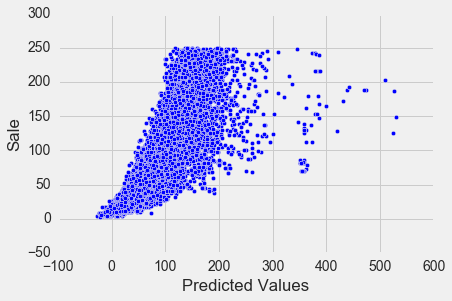

MSE: 835.931
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4950.
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:38   Log-Likelihood:            -1.5648e+05
No. Observations:               32714   AIC:                         3.130e+05
Df Residuals:                   32698   BIC:                         3.131e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept  

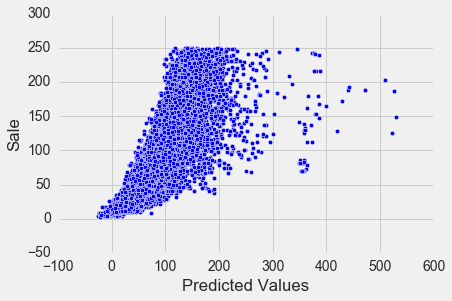

MSE: 835.386
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2858.
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:39   Log-Likelihood:            -1.5647e+05
No. Observations:               32714   AIC:                         3.130e+05
Df Residuals:                   32687   BIC:                         3.132e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept  

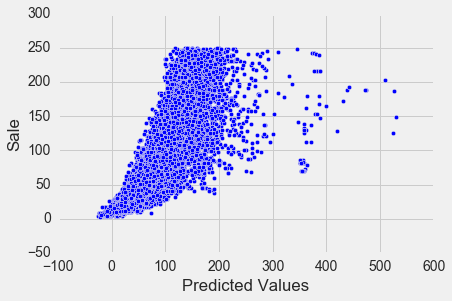

MSE: 835.787
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4642.
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        19:38:40   Log-Likelihood:            -1.5648e+05
No. Observations:               32714   AIC:                         3.130e+05
Df Residuals:                   32697   BIC:                         3.131e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept  

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')


model0 = smf.ols(formula = 'sale ~ retail', data = df).fit()
predictions1 = model0.predict()


plt.scatter(predictions1, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions1)
print(model0.summary())


# adding Sold decreased our MSE so we can leave this predictor in our model 
model1 = smf.ols(formula = 'sale ~ retail + sold', data = df).fit()
predictions1 = model1.predict()

plt.scatter(predictions1, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions1)
print(model1.summary())

# adding Store (number of stores per zip code) decreased our MSE so we can leave this predictor in our model 
model2 = smf.ols(formula = 'sale ~ retail + sold + store', data = df).fit()
predictions2 = model2.predict()

plt.scatter(predictions2, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions2)
print(model2.summary())

# adding Vendor (number of vendors per zip code) did not change our MSE (although, it was significant 
#predictor of sale) so we decided not to include it in our model since there was no change in MSE.
model3 = smf.ols(formula = 'sale ~ retail + sold + store + vendor', data = df).fit()
predictions3 = model3.predict()

plt.scatter(predictions3, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions3)
print(model3.summary())



# adding Month (the month when the sales transaction took place) decreased our MSE so we can leave this predictor in our model 

# adding bottle volume
model4 = smf.ols(formula = 'sale ~ retail + sold + store + volume', data = df).fit()
predictions4 = model4.predict()

plt.scatter(predictions4, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions4)
print(model4.summary())


# adding Volume (the average volume per bottle) decreased our MSE so we can leave this predictor in our model 

model5 = smf.ols(formula = 'sale ~ retail + sold + vendor + volume+C(category)', data = df).fit()
predictions5 = model5.predict()

plt.scatter(predictions5, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions5).round(3)
print(model5.summary())

model6 = smf.ols(formula = 'sale ~ retail + sold + vendor + volume+C(category) + C(month)', data = df).fit()
predictions6 = model6.predict()

plt.scatter(predictions6, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions6).round(3)
print(model6.summary())


model6 = smf.ols(formula = 'sale ~ retail + sold + vendor + volume+C(category) + C(year)', data = df).fit()
predictions6 = model6.predict()

plt.scatter(predictions6, df["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df["sale"], predictions6).round(3)
print(model6.summary())

In [85]:
df_final_model=pd.pivot_table(df,index=['zip','category'], values=['volume', 'retail', 'sold', 'sale','vendor']);
df_final_model.reset_index(inplace=True)

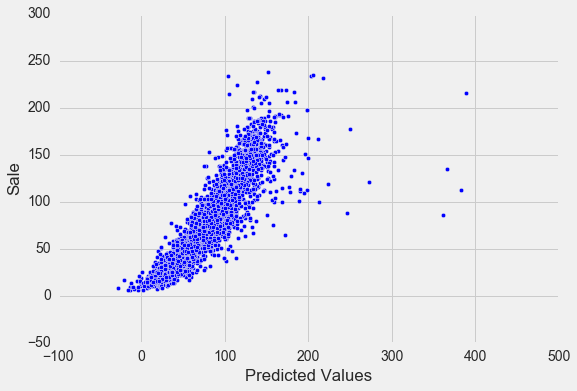

MSE: 404.403794
                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     853.6
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        20:41:22   Log-Likelihood:                -17062.
No. Observations:                3860   AIC:                         3.416e+04
Df Residuals:                    3844   BIC:                         3.426e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercep

In [110]:
model_final = smf.ols(formula = 'sale ~ retail + sold + vendor + volume+C(category)', data = df_final_model).fit()
predictions_final = model_final.predict()

plt.scatter(predictions_final, df_final_model["sale"])
plt.xlabel("Predicted Values")
plt.ylabel("Sale")
plt.show()
print "MSE:", mean_squared_error(df_final_model["sale"], predictions_final).round(6)
print(model_final.summary())

In [87]:

colors = {'WHISKEY' : 'y', 
          'VODKA' : 'm', 
          'RUM' : 'teal', 
          "LIQUOR" : 'indigo', 
          'BRANDY' : 'Darkgoldenrod', 
          'SCHNAPPS' : 'coral', 
          'TEQUILA':'Maroon',
          'GIN' : 'gold', 
          'COCKTAILS' : 'darkgreen', 
          'SCOTCH' : 'grey',
           'SPIRITS' : 'pink'}

liq_list = ['WHISKEY', 'VODKA', 'RUM', 'LIQUOR', 'BRANDY', 'SCHNAPPS', 'TEQUILA', 'GIN', "COCKTAILS",\
              'SCOTCH','SPIRITS']

In [88]:
df_predictions=pd.DataFrame(predictions_final, np.array(df_final_model["sale"]))

df_predictions.reset_index(inplace=True);
df_predictions.rename(columns={'index':'sale',0:'OLS LINE', }, inplace=True)

In [89]:
df_scatter=df_final_model.merge(df_predictions)

df_scatter.head(5)

,zip,category,retail,sale,sold,vendor,volume,OLS LINE
0,50002,BRANDY,8.88,79.92,9.0,14,750.0,72.850090
1,50002,GIN,4.95,59.40,12.0,14,500.0,72.327446
2,50002,LIQUOR,5.07,60.84,12.0,14,750.0,101.933976
3,50002,LIQUOR,5.07,60.84,12.0,14,750.0,101.184445
4,50002,LIQUOR,5.07,60.84,12.0,14,750.0,99.685383


In [90]:
x=df_scatter['OLS LINE']
y=df_scatter['sale']
z=np.polyfit(x, y, 1)

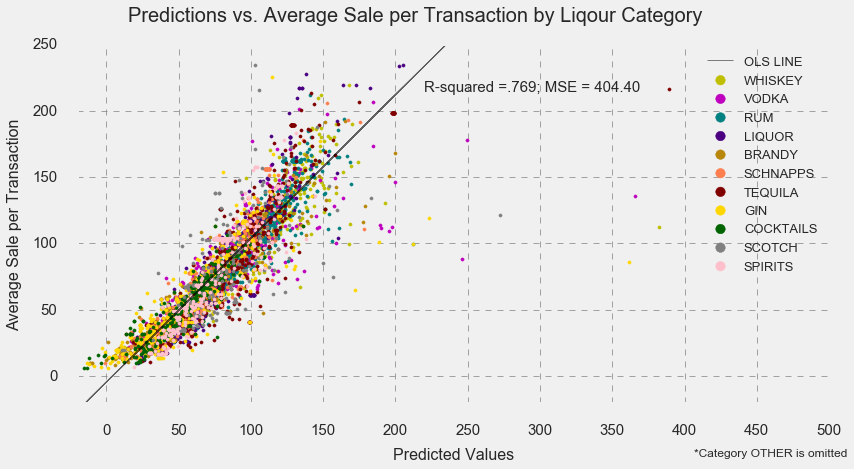

In [91]:
#plt.style.use('bmh')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))

for i in liq_list:
    y = df_scatter[df_scatter['category'] == i]
    plt.scatter(y['OLS LINE'],y['sale'] , color = colors[i],s=10,\
    label = i)
plt.plot(df_scatter['OLS LINE'], z[0] * df_scatter['OLS LINE'] + z[1], lw=.8, alpha=.6,color='k')
plt.xlabel('Predicted Values',fontsize=16,labelpad=10)
plt.ylabel('Average Sale per Transaction',fontsize=16, labelpad=10)
plt.title('Predictions vs. Average Sale per Transaction by Liqour Category', \
          fontsize = 20,y=1.05,x=.45)
plt.xlim([-20, 450])
plt.ylim([-20,250])

plt.tick_params(axis='both', which='major', pad=20)
plt.xticks(range(0,550, 50), fontsize=15)
plt.yticks(range(0,300, 50), fontsize=15)
plt.legend(loc='upper right', fontsize = 13,markerscale=3)
# plt.legend(loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode='expand')
plt.annotate('*Category OTHER is omitted',(.98,0), \
             (-120, -45), xycoords='axes fraction', textcoords='offset points', \
             va='top', fontsize = 12)
plt.annotate('R-squared =.769; MSE = 404.40', xy=(2, 1), xytext=(220, 215), fontsize=15)
plt.grid(color='gray', linestyle='--', alpha=.7)

plt.show()

In [92]:
model_final = smf.ols(formula = 'sale ~ retail + sold + vendor + volume+C(category)', data = df_final_model).fit();
df_scatter['resid'] = model_final.resid
resid = model_final.resid
df_scatter['yhat'] = model_final.fittedvalues


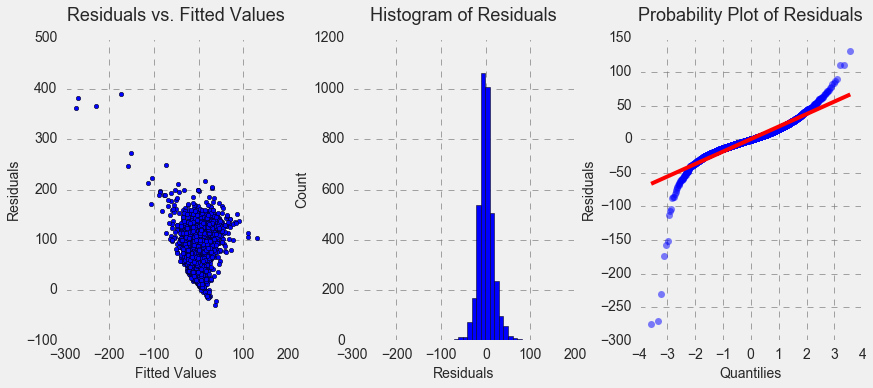

In [93]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

plt.style.use('fivethirtyeight')
plt.tight_layout(w_pad=2)
# plt.tight_layout(pad=0.04, w_pad=2, h_pad=1.0)

axes[0].scatter(df_scatter['resid'],df_scatter['yhat'],edgecolor='black')
axes[0].set_title("Residuals vs. Fitted Values",fontsize=18,y=1.04)
axes[0].set_xlabel("Fitted Values",fontsize=14)
axes[0].set_ylabel("Residuals",fontsize=14)
axes[0].grid(color='gray', linestyle='--', alpha=.7)

axes[1].hist(resid, bins=40, color='blue',edgecolor='black')
axes[1].set_title("Histogram of Residuals",fontsize=18,y=1.04)
# axes[0].grid(color='gray', linestyle='--', alpha=.5)
axes[1].set_ylabel('Count', fontsize=14,x=1.06)
axes[1].set_xlabel('Residuals',fontsize=14)
# axes[0].set_ylim([-150,200])
axes[1].set_xlim([-300,200])
axes[1].set_xticks(range(-300,250, 100))
axes[1].grid(color='gray', linestyle='--', alpha=.7)

stats.probplot(resid, dist="norm", plot=pylab)
dots = fig.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')
[d.set_alpha(0.5) for d in dots]
axes[2].set_title("Probability Plot of Residuals",fontsize=18,y=1.04)
axes[2].set_xlabel("Quantilies",fontsize=14)
axes[2].set_ylabel("Residuals",fontsize=14)
axes[2].grid(color='gray', linestyle='--', alpha=.7)

plt.show()



In [94]:
col_needed=['sale', 'retail', 'sold', 'vendor' ,'volume']

data_cont=df[col_needed]

In [95]:
from sklearn.preprocessing import StandardScaler

x=data_cont

X_norm =StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=data_cont.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32714 entries, 0 to 32713
Data columns (total 5 columns):
sale      32714 non-null float64
retail    32714 non-null float64
sold      32714 non-null float64
vendor    32714 non-null float64
volume    32714 non-null float64
dtypes: float64(5)
memory usage: 1.2 MB


In [96]:
import patsy

categ_data= ['category']
df_cat_prep=df[categ_data]
X = patsy.dmatrix('~ C(category)', df_cat_prep)
df_cat=pd.DataFrame(X, columns=X.design_info.column_names)

In [97]:
df_final = pd.concat([df_cat, df_stand], axis=1)
len(df_final)

32714

In [98]:
y = df.sale
X = df_final

In [99]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.metrics import r2_score


cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)


dt = DecisionTreeRegressor()
bdr = BaggingRegressor(DecisionTreeRegressor())
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
gbst = GradientBoostingRegressor()
mlp = MLPRegressor()



def score(model, name):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1,scoring='neg_median_absolute_error')
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))



        
score(dt,"Decision Tree")
score(bdr, "Bagging DT")
score(rfr, "Random Forest")
score(etr, "Extra Trees")
score(abr, "Ada Boost")
score(gbst, "Grad Boosting")
score(mlp, "Neural Network")



Decision Tree Score:	-0.003 ± 0.0
Bagging DT Score:	-0.004 ± 0.0
Random Forest Score:	-0.004 ± 0.0
Extra Trees Score:	-0.004 ± 0.001
Ada Boost Score:	-2.37 ± 0.356
Grad Boosting Score:	-0.224 ± 0.006
Neural Network Score:	-0.016 ± 0.004


In [106]:
from sklearn.cross_validation import train_test_split

scores = cross_val_score(dt, X, y, cv=cv,scoring='neg_median_absolute_error')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)
dt_regr = DecisionTreeRegressor(max_depth=3)
dt_reg2=dt_regr.fit(X_train, y_train)

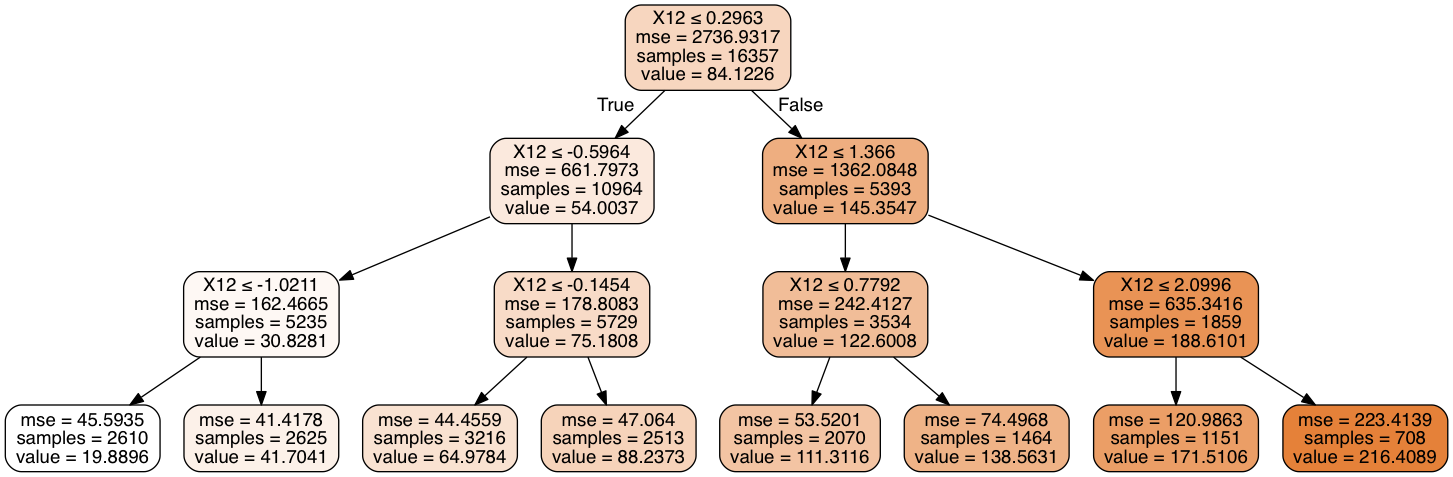

In [101]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus
from IPython.display import Image

# dot_data = StringIO()  
# export_graphviz(dt_regr, out_file=dot_data,  
#                 feature_names=X.columns,  
# #                 class_names=le.classes_,  
#                 rounded=True,
#                 proportion=True,
#                 special_characters=True, filled=True)  
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# dot_data.set_color('blue')
# Image(graph.create_png())



dot_data = export_graphviz(dt_regr, out_file=None, 
#                          feature_names=iris.feature_names,  
#                          class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png()) 

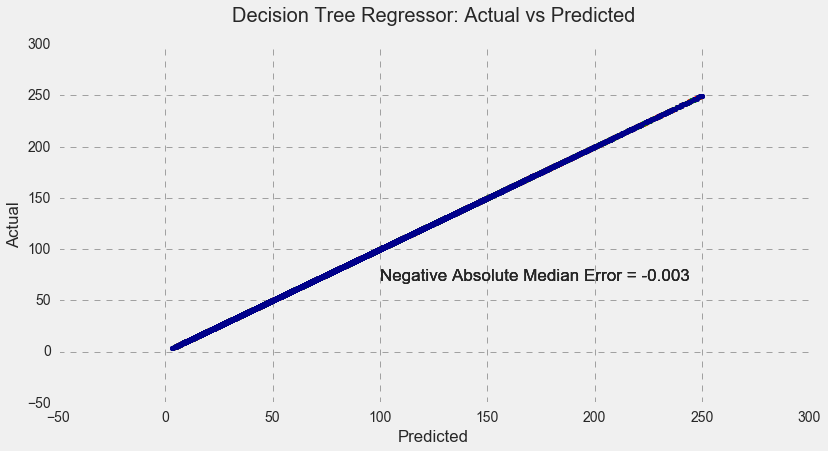

In [108]:
plt.figure(figsize=(12,6))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Regressor: Actual vs Predicted', fontsize = 20, y = 1.05)
plt.style.use('fivethirtyeight')

def do_plot(model, m=None):
    for fold, color in zip(cv, ['red', 'green', 'darkblue']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.grid(color='gray', linestyle='--', alpha=.7)
        plt.scatter(y_test, y_pred, color=color)
#         plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(100,70, "Negative Absolute Median Error = "+str(m), fontsize=17)


do_plot(rfr, scores.mean().round(3))